### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import scipy
%matplotlib inline

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [213]:
data = pd.read_csv('coupons.csv')

In [214]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [215]:
#Discover which variables have null values
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

The following values contain null values: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50

3. Decide what to do about your missing data -- drop, replace, other...

In [216]:
#Drop all rows with null values
NewDFDropNul = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In order to answer this question, one needs to first determine the columns in the data set.  Then   one can query the groups that accepted and rejected the coupons.

In [217]:
#View columns in new data set will no null values
NewDFDropNul.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [218]:
#Query group that said "No" to coupon, or that rejected coupon
ISaysNoGroup = NewDFDropNul.query("Y==0")

In [219]:
#Query group that said "Yes" to coupon, or that accepted coupon
ISaysYesGroup = NewDFDropNul.query("Y==1")

In [220]:
#Obtain count for group that said "No", rejected coupon
ISaysNoGroup.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.0
mean,63.695652,0.413043,1.0,0.630435,0.108696,0.130435,0.869565,0.0
std,17.652031,0.497821,0.0,0.488021,0.314696,0.340503,0.340503,0.0
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0


Count for those that rejected the coupon is 46.

In [221]:
#Obtain count for group that said "Yes", accepted coupon
ISaysYesGroup.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,62.258065,0.387097,1.0,0.596774,0.145161,0.129032,0.870968,1.0
std,18.324878,0.491062,0.0,0.494550,0.355139,0.337972,0.337972,0.0
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.0
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.0
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.0
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0


Count for those that rejected the coupon is 62.

In [222]:
#Count of 46 rejected coupon ("No"), Count of 62 accepted coupon ("Yes"). Obtain total count for percentage calculation.
46 + 62

108

In [223]:
#Percent that rejected coupon
46/108

0.42592592592592593

In [224]:
#Percept that accepted coupon 
62/108

0.5740740740740741

57.41% of the total observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

In [225]:
#Plotly bar plot to visualize coupon column
px.bar(NewDFDropNul, x='coupon')

6. Use a histogram to visualize the temperature column.

In [226]:
px.histogram(NewDFDropNul, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [227]:
#Create new data frame that contains just the bar coupons
BarOnlyDF = NewDFDropNul[NewDFDropNul['coupon'].str.contains("Bar")]

In [228]:
#View histogram to confirm data frame includes just the bar coupons
px.histogram(BarOnlyDF, x ='coupon')

2. What proportion of bar coupons were accepted?


In [229]:
#Generate histogram where x-axis is shows "Bar" variable grouped by "Y" (counts Y=0, "No", and Y=1, "Yes", within bar coupons) 
px.histogram(BarOnlyDF, x="coupon", color="Y")

Hovering over the Plotly interactive graph, the blue area shows count of accepted bar coupons. The red area shows the count of rejected bar coupons. The proportion of accepted coupons was 3 of 13.  

In [230]:
#Perform percentage calculation for proportion of accepted coupons
3/13

0.23076923076923078

The proportion of bar coupons accepted was 3 of 13 coupons (23.08% of bar coupons). 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [231]:
px.histogram(NewDFDropNul, x='Y', color='Bar')

Hovering over the chart, we can see the acceptance rate on the right side of the histogram (Y=1). For those who went to a bar three or fewer times a month (red and blue groups), the count was 52 (41+11=52). For those who went more than three times a month (green group), the count was 10. Hovering over the chart on the left side of the histogram, we can obtain the total of those who went to a bar three or fewer times a month, which was 86.  We can also obtain the total of those who went to a bar more than three times a month was 24.

In [232]:
#Rate of acceptance for those whe went to a bar more than three times a month
10/24

0.4166666666666667

In [233]:
#Rate of acceptance for those whe went to a bar less than three times a month
52/86

0.6046511627906976

The acceptance rate was higher for those who went to a bar three or fewer times a month (60.47%) to those who went to a bar three or more times a month (41.67%).

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [234]:
#Sort Values in DataFrame by age 
SortAge = NewDFDropNul.sort_values('age')

In [235]:
#Compare Ages using Bar Plot
px.bar(SortAge, x='age', y='Y', color='Bar')

There is no difference in the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. The data shows 100% acceptance rate for both groups. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


My first step to answer this question is to explore the variable occupation.

In [236]:
#Create Data Frame with occupations only 
Occupation = NewDFDropNul['occupation']

In [237]:
#Explore occupation variable in histogram
px.histogram(Occupation, x='occupation')

Null values were dropped from the DataFrame in earlier steps. Of the remaining data, it appears that occupations other than farming fish, or forestry are all that exist in the data set. That determines that one can analyze the data without the occupation variable.

In [238]:
#Create a bar plot to compare the acceptance rate between drivers who go to bars more than once a month and passengers that were not a kid.
px.bar(NewDFDropNul, x='passanger', y='Y', color='Bar')

It is possible to view from this Plotly bar graph, and in this analysis, that all groups accepted the coupon (there is no case of Y=0). Therefore, the rate of acceptance was 100%, and equal, for drivers who go to bars more than once a month, have passengers that were not a kid, and had occupations other than farming, fishing, or forestry. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



I have a process to answer the question (Question no. 7) of comparing acceptance rates between drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed. My first step, again, to answer this question is to explore the variable marital status.

In [239]:
#Create Data Frame with marital status variable only
MaritalStatus = NewDFDropNul['maritalStatus']

In [240]:
#Explore occupation variable in histogram
px.histogram(MaritalStatus, x='maritalStatus')

Null values were dropped from the DataFrame in earlier steps. Of the remaining data, it appears that marital statuses "Single" and "Married partner" are all that exist. That determines that one can analyze the data without the marital status variable. Therefore, we achieve ths same bar graph as in the previous example. 

In [241]:
#Create a bar plot to compare the acceptance rate between drivers who go to bars more than once a month and passengers that were not a kid.
px.bar(NewDFDropNul, x='passanger', y='Y', color='Bar')

It is possible to view from this Plotly bar graph, and in this analysis, that all groups accepted the coupon (there is no case of Y=0). Therefore, the rate of acceptance was 100%, and equal, for drivers who go to bars more than once a month, have passengers that were not a kid, and had marital status other than widowed. 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

First, we know from these observations that of 13 bar coupons, three drivers accepted. It is difficult to hypothesize based on the existing analyses. However, we can continue to explore the data for the three drivers that accepted the bar coupon.   

In [242]:
#Create a data frame isolating the three drivers that accepted the bar coupon,based on existing Data Frames from analyses
BarYesGroup = ISaysYesGroup[ISaysYesGroup['coupon'].str.contains("Bar")]

In [243]:
#Explore the data for these three drivers, to find what the drivers have in common
BarYesGroup.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
7321,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,0,0,1,0,1


In [244]:
#Draw histogram to show age and marital status variables for three drivers who accepted bar coupons
px.histogram(BarYesGroup, x= 'age', color='maritalStatus')

After this entire data exploration, we can see that age and marital status are the same for the three drivers that accepted the bar coupon. We can hypothesize that if a person is 26 years old and single, that this person might be highly likely to accept the bar coupon. However, with three persons, I would not report this with the current data.

Question 8: Independent Investigation

Now, I will perform an independent investigation, using the bar coupon example as motivation. I will explore one of the other coupon groups and try to determine the characteristics of the passengers who accept the coupons.  

First, I want to explore the characteristics of passengers in the data set.

In [245]:
#Create a histogram to explore passengers variable and variable "Y" (Y=0 means coupon rejection, Y=1 means coupon acceptance)
px.histogram(NewDFDropNul, x='passanger', y='Y', color='Y')

We know from earlier analyses that 62 of 108 drivers accepted the coupon. When we examine the passenger variable in this histogram, we find that in 31 of 62 cases that drivers accepted the coupon - there was a passenger. We know that this histogram contains zero coupon rejections because of our grouping variable. If there were rejections, we would see red areas on this graph. We see none. We learn that there is an exact 50% split in the data that we can show with a formal plot. We also know that we cannot make predictions about coupon acceptance based on number of passengers.

Text(0.5, 1.0, 'Drivers Alone: 31 of 62 Accept Coupons')

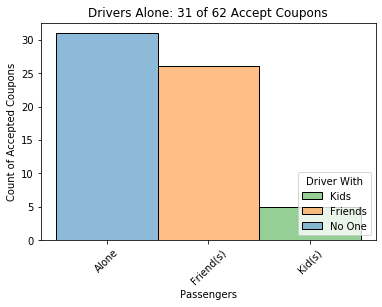

In [246]:
#Creating Formal Plot in Seaborn, with correct titles (graph, legend, and axes)
sns.histplot(data=ISaysYesGroup, x='passanger', hue='passanger')
plt.xticks(rotation=45)
plt.xlabel('Passengers')
plt.ylabel('Count of Accepted Coupons')
plt.legend(title='Driver With', loc='lower right', labels=['Kids', 'Friends', 'No One'])
plt.title('Drivers Alone: 31 of 62 Accept Coupons')

This formal plot confirms that we cannot make predictions about coupon acceptance based on characteristics of passengers. We will need to explore more groups.

Our goal was to examine the data and to create a brief report that highlights the differences between customers who did and did not accept coupons. The reason is, when we determine profiles for customers that accepted, or rejected, the coupons, we can later use these profiles to predict future coupon acceptance or rejection. 


Now to more data exploration. I will need to generate a histogram that depicts coupon acceptance and rejection by type of coupon.

In [247]:
#Generate histogram where x-axis is "Y" variable (counts Y=0, "No", and Y=1, "Yes"), grouped by coupon
px.histogram(NewDFDropNul, x="Y", color="coupon")

It appears there are no large differences in numbers between the accepted and rejected coupons, except that more persons accepted restaurant coupons than rejected them. I am therefore choosing to analyze the group on the right, for coupon acceptance profiles ("Y"= 1)

In [248]:
#Explore coupon acceptance data with histogram
px.histogram(ISaysYesGroup, x ="coupon")

The group that accepted the coupon for coffee house has the highest count, so I choose to examine this group. 

In [249]:
#Create Data Frame showing group that accepted coffee house coupons
CoffeeGroup = ISaysYesGroup[ISaysYesGroup['coupon'].str.contains("Coffee House")]

In [250]:
#Explore using .head() 
CoffeeGroup.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1243,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,1
1249,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1252,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1253,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,1


In the group that accepted bar coupons, marital status and age were significant characteristics in developing a profile for this group. Therefore, I will explore marital status and age for the group that accepted coffee coupons.

In [251]:
#Histogram for marital status variable
px.histogram(CoffeeGroup, x = "maritalStatus", color="age")

We can see here that for the group that accepted coupons for coffee houses, results were not as clear cut. Eleven of 19 (11/19 = 57.90%) persons that accepted coupons for coffee houses were 26 years old. This percentage is still closer to 50%. We can also see in this histogram that the number that were single and married are also almost the same.

In [252]:
px.histogram(CoffeeGroup, x = "weather", color="maritalStatus")

In [253]:
#One more exploratory graph - to ensure that all accepted coupons did not occur on a sunny day
px.histogram(NewDFDropNul, x="Y", color="weather")

Text(0.5, 1.0, 'Sunny Weather: 18 of 19 Accepted Coupons')

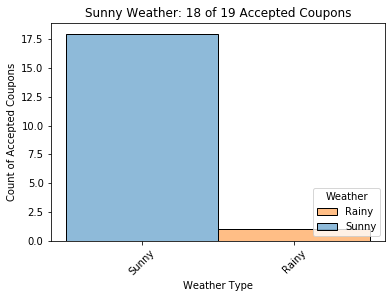

In [254]:
#Creating Formal Plot in Seaborn, with correct titles (graph, legend, and axes)
sns.histplot(data=CoffeeGroup, x='weather', hue='weather')
plt.xticks(rotation=45)
plt.xlabel('Weather Type')
plt.ylabel('Count of Accepted Coupons')
plt.legend(title='Weather', loc='lower right', labels=['Rainy', 'Sunny'])
plt.title('Sunny Weather: 18 of 19 Accepted Coupons')

In [255]:
#Calculate percentage (18 of 19)
18/19

0.9473684210526315

This graph depicts a strong finding. Eighteen of 19 (94.74%) persons that accepted coupons for coffee houses accepted the coupons on a sunny day. Future directions for this research could include what type of coffee is purchased, for instance hot or iced. If hot coffee is purchased, for example, this finding would be counterintuitive, as it would make more sense that iced coffee would be purchased on a sunny day. 

It appears there are no large differences in numbers between the accepted and rejected coupons, except that more persons accepted restaurant coupons than rejected them. After exploring much data for rejected and accepted coupons, and focusing on analyses for accepted coupons, there has been one strong pattern discovered. It is that 94.74% (18 of 19) coupons for coffee houses were accepted in the context of a sunny day. To answer the question, will the customer accept the coupon?  The correct answer is, based on the lack of clear contrasts found in the data, we don't know. However, we have discovered a strong pattern for coffee houses. Based on the data, any customer is highly likely to accept the coffee house coupon on a sunny day. 